###  CARGA DE LIBRERIAS


In [1]:
import missingno as mo
import pandas as pd
import os
from pathlib import Path
import numpy as np

### CARGA DE DATOS

In [2]:
ruta = Path("Datos") / "DatosOrginales" / "cancellation_data_for_mondragon_unibertsitatea_2024.csv"
df = pd.read_csv(ruta)

df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


### LIMPIEZA

In [3]:
df.columns
df.dtypes
# no hay nada de tipo fecha --> pensar si convertirlo a fecha o no

booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


### 1. CORRECCION TIPO DE COLUMNAS

In [4]:
columnas_fecha = ["booked_at", "checkin_time", "checkout_time",'asset_opening_date','last_entry_form_completed_at','cancelled_at']

for col in columnas_fecha:
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")

df.head()

C:\Users\maita\AppData\Local\Temp\ipykernel_53220\2151506589.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")
C:\Users\maita\AppData\Local\Temp\ipykernel_53220\2151506589.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")
C:\Users\maita\AppData\Local\Temp\ipykernel_53220\2151506589.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A stri

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaT,NaN,NaN
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaT,NaN,NaN
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaT,NaN,NaN
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaT,NaN,NaN
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaT,NaN,NaN


### 2. ANALISIS DE NA'S

In [5]:
df.isna().sum() # missings en las columnas: travel_agency, completed_entry_forms,last_entry_form,cancelled_at, cancellation_reason, cancellation_lead_time


booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              18106
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      3276
all_entry_forms_completed           0
last_entry_form_completed_at    15948
returning_inhabitant                0
recurrence  

<Axes: >

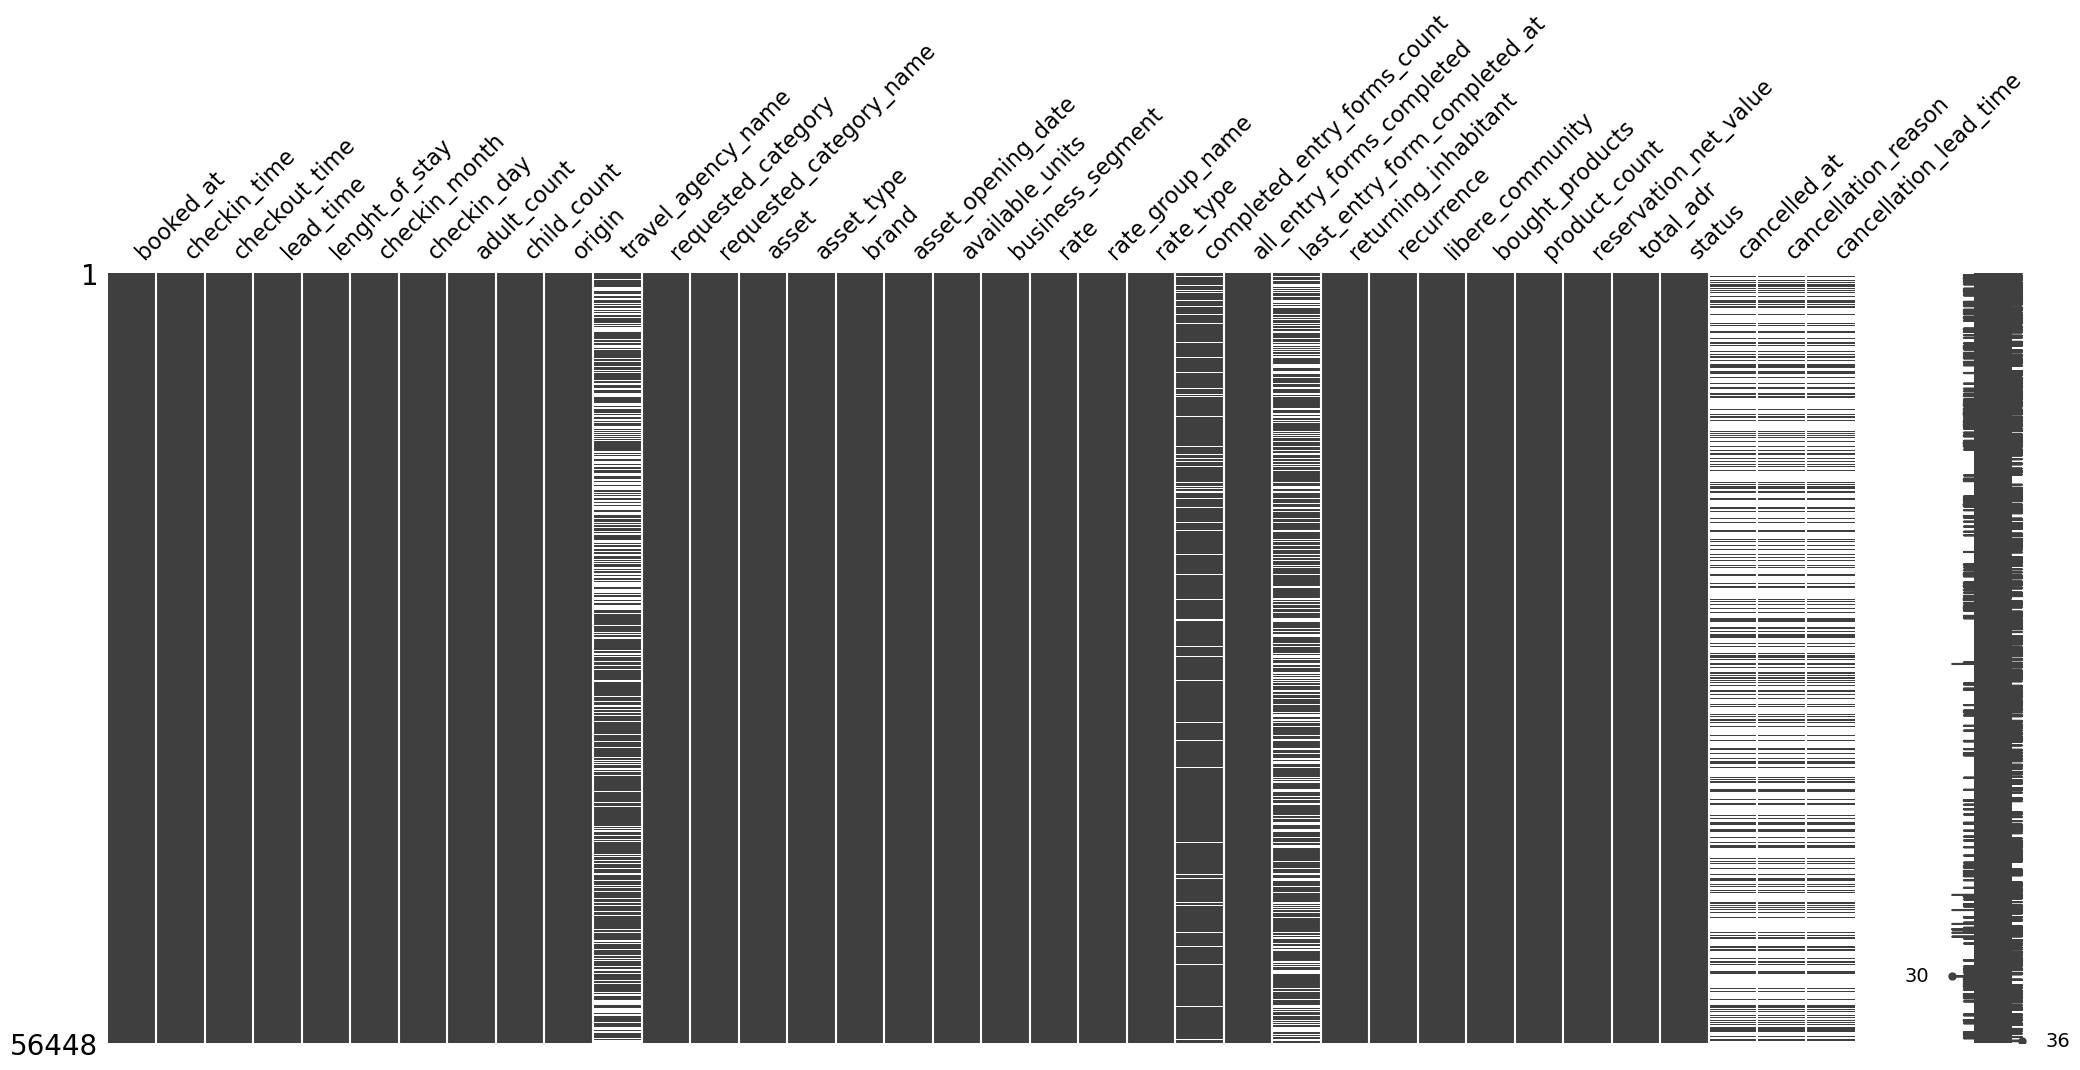

In [6]:
mo.matrix(df)

### travel agency name

In [7]:
df['travel_agency_name'] # si la reserva no se ha hecho por agencia, es NA --> IMPUTAMOS PONIENDO "RESERVA SIN AGENCIA"
df['travel_agency_name'] = df['travel_agency_name'].fillna('Reserva sin agencia') 

In [8]:
df['travel_agency_name'].isna().sum() # no hay ningun NA

0

### completed entry forms, all entry forms y last entry forms

In [9]:
df['all_entry_forms_completed'].isna().sum()
# la columna all entry forms no tiene NA's y es la columna que nos dice si todas las partes de entrada fueron completados o no.
# por lo que todos los usuarios han completado las partes de entrada

# sin embargo completed entry forms y last entry forms si contienen NA lo que nos indica que por un lado
# no todas las personas completaron el formulario de check-in (posiblemente por cancelación) y que no sabemos el momento exacto
# en el que se completo el último parte de entrada. No obstante, sabemos que TODAS LAS PARTES DE ENTRADA HAN SIDO COMPLETADOS



0

In [10]:
# imputamos COMPLETED_ENTRY_FORMS_COUNT con -1 para que los datos sigan siendo numericos y poder hacer después un análisis
df['completed_entry_forms_count'] = df['completed_entry_forms_count'].fillna(-1)  # -1 = no completado

# imputamos LAST_ENTRY_FORM_COMPLETED_AT con una fecha indicativa para que luego podamos hacer un análisis adecuado. fecha: '1900-01-01'
# Para conteo

df['last_entry_form_completed_at'] = df['last_entry_form_completed_at'].fillna(pd.Timestamp('1900-01-01'))  # fecha indicativa
  

In [12]:
print(df['completed_entry_forms_count'].isna().sum())
df['last_entry_form_completed_at'].isna().sum()

0


0

### cancellation reason, cancelation lead time y cancelled at

In [13]:
# los que son NA es porque no han cancelado (se ha mirado si podria ser que se haya cancelado pero no se haya dado informacion para poder imputarlo de 
# otra forma pero si se ha cancelado y no hay informacion del porqué pone: refuse to detail. También se ha mirado si con la resta
# se podria obtener cancellation lead time pero todas estan hechas, es decir no faltan valores para calcular)
columnas_cancelacion = ['cancelled_at', 'cancellation_reason',
       'cancellation_lead_time']
df[columnas_cancelacion] = df[columnas_cancelacion].fillna('reserva no cancelada')


### verificamos que el df no tenga ningun missing

In [ ]:
df.isna().sum() # hay un missing en total_adr: Total average daily rate, ingresos promedios por noche de la reserva 
df[df['total_adr'].isna()] # estan todos los datos menos ese, y el valor neto de la reserva es 0 también
df['total_adr'] = df['total_adr'].fillna(0) # rellenamos con 0
